## ChurnShield: Protecting Customer Relationships Through Predictive Intelligence ##

## 1.Business Understanding

Understanding and predicting customer churn is crucial for **Horizon Trust Bank**. Customer churn impacts the bank's revenue and profitability and increases the costs associated with acquiring new customers. Retaining loyal customers boosts the bank's reputation and competitive edge. By utilizing predictive modeling, Horizon Trust Bank seeks to proactively mitigate customer attrition, customize services, and optimize marketing efforts, thereby ensuring long-term customer loyalty.








**1.1 Introduction:**
    
Horizon Trust Bank, a prominent financial institution, offers diverse banking services. Like any bank, retaining customers is pivotal for market presence and profitability. Identifying potential churners is vital for targeted strategies and retaining valuable clients. In this project, we delve into customer demographics, banking behaviors, and historical churn data. The objective is to construct a predictive model to anticipate churn, providing Horizon Trust Bank actionable insights for enhancing customer retention strategies.

**1.2Problem statement:**
    
Horizon Trust Bank is in constant worry of whether the customer will churn or not. This problem has lead to them unable to make stable and precise decision on the customers that visit, additionally to maintain the already present customers.

**1.3 Metric of Success:**
    
The model will be concidered successful through it's ability to predict accurately whether the customer is likely to churn or not based on their historical behavior and demographic information.

**1.4 Main Objective:**
    
Build a robust customer churn prediction model, enabling data-driven decisions, boosting customer satisfaction, and reinforcing Horizon Trust Bank's competitive standing.

**1.5 Specific Objective:**
    
* Determine factors that have a higer effect on customer churning.
* Build different models to evaluate the best model.

**1.6 Experimental design:**
    
**1.Exploratory Data Analysis (EDA):** Explore the dataset, extracting insights into customer demographics, banking patterns, and churn distribution, identifying potential trends.

**2.Data Preprocessing:** Handle missing values, encode categorical variables, and scale features, ensuring the data is prepared for model training.

**3.Feature Importance Analysis:** Leverage SHAP (SHapley Additive exPlanations) to pinpoint crucial features affecting customer churn for Horizon Trust Bank.

**4.Model Building:** Train and assess two machine learning models, Decision Trees and Random Forests, to predict customer churn effectively.

**5.Model Evaluation:** Evaluate model performance using key metrics like accuracy, F1 score, precision, recall, and ROC-AUC curve, ensuring robustness and generalization.

**6.Interpretation and Recommendations:** Extract insights from model outcomes to identify influential churn factors. Provide actionable recommendations to enhance customer retention strategies.

 ## Data Relevance
The dataset has 9970 rows, and 11 columns. The dataset has the following information which will give a better and insight of customer churning.

1.`RowNumber`: A sequential number assigned to each row in the dataset.

2.`CustomerId`: A unique identifier for each customer in the bank.

3.`Surname`: The last name of the customer.

4.`CreditScore`: The credit score of the customer, representing their creditworthiness.

5.`Geography`: The geographical location of the customer (e.g., France, Spain, Germany).

6.`Gender`: The gender of the customer (Male or Female).

7.`Age`: The age of the customer.

8.`Tenure`: The number of years the customer has been with the bank.

9.`Balance`: The account balance of the customer.

10.`NumOfProducts`: The number of bank products the customer has purchased.

11.`HasCrCard`: Whether the customer has a credit card (1 if yes, 0 if no).

12.`IsActiveMember`: Whether the customer is an active member (1 if yes, 0 if no).

13.`EstimatedSalary`: The estimated salary of the customer.

14.`Exited`: The target variable indicating whether the customer churned (1 if yes, 0 if no).

## 2.Data Understanding

Explore the data and have its general understanding that is its shape, columns available, is it clean, its relationship using describe function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve,roc_auc_score, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("Horizon Trust Bank Churn data_set.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


In [3]:
print(df.shape)

(10000, 14)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9996 non-null   float64
 4   Geography        9997 non-null   object 
 5   Gender           9997 non-null   object 
 6   Age              9994 non-null   float64
 7   Tenure           9963 non-null   float64
 8   Balance          9998 non-null   float64
 9   NumOfProducts    9986 non-null   float64
 10  HasCrCard        9998 non-null   float64
 11  IsActiveMember   9999 non-null   float64
 12  EstimatedSalary  9988 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9996.000000,9994.000000,9963.000000,9998.000000,9986.000000,9998.000000,9999.000000,9988.000000,10000.000000
mean,5000.50000,1.569094e+07,650.530912,38.923354,5.014554,76473.453397,1.530543,0.705441,0.515052,100085.506746,0.203700
std,2886.89568,7.193619e+04,96.669212,10.490050,2.891654,62397.079186,0.581744,0.455867,0.499798,57520.360859,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50974.077500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


 **Observations from the dataset**

**1**.The dataset contains 10000 entries

**2**.The dataset contains 14 columns  

**3**.The columns represent features such as `customer ID`, `surname`, `credit score`, `geography`, `gender`, `age`, `tenure`, `balance`, `number of products`, whether the customer has a `credit card`, whether the customer is an active member, `estimated salary`, and whether the customer exited

**4**.`Surname`, `Geography`, and `Gender` are categorical variables.

**5**.There are missing values in several columns, including `CreditScore`, `Geography`, `Gender`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, and `EstimatedSalary`

## 3.Data Cleaning

* Identify and handle missing values
* Scrub the data to remove any inaccuracies or inconsistencies
* Transform and organize the data into a standardized format for analysis
* Enhance the quality and usability of the data through restructuring and formatting adjustments.


**gather relevant datasets**

Here, we will drop the data that has no effect on whether a customer churns or not. The following data will not have much relevance.

* `RowNumber` - This is the index of each row, hence does not have much effect on customer churning

* `CustomerId` - This is a unique customer identifier therefor has no effect on customer churning

* `Surname` - This is also s unique identifier therefore has no effect on customer churning



**3.1 Drop irrelevant columns**

We'll drop columns that don't affect customer churn (RowNumber, CustomerId, Surname).

In [6]:
# Drop irrelevant columns
irrelevant_columns = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(irrelevant_columns, axis=1)


In [7]:
# confirm that the columns have been dropped
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


**3.2 Identify and handle missing values**

Let's start by checking for missing values:

In [8]:
# Check for missing values
df.isnull().sum()


CreditScore         4
Geography           3
Gender              3
Age                 6
Tenure             37
Balance             2
NumOfProducts      14
HasCrCard           2
IsActiveMember      1
EstimatedSalary    12
Exited              0
dtype: int64

**3.3 Handle missing values**

We'll drop rows with missing values in critical columns and impute the rest.

In [9]:
# Drop rows with missing values in the specified columns
df.dropna(subset=['CreditScore', 'Geography', 'Gender', 'Age', 'HasCrCard', 'IsActiveMember', 'Balance', 'EstimatedSalary'], inplace=True)

# Calculate and impute the mode for 'Tenure' and 'NumOfProducts'
df['Tenure'].fillna(df['Tenure'].mode()[0], inplace=True)
df['NumOfProducts'].fillna(df['NumOfProducts'].mode()[0], inplace=True)


**3.4 Transform categorical variables**

We need to encode categorical variables `Geography` and `Gender` for analysis.

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()

df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0


**Summary of Data Cleaning Steps**

**1.Dropped irrelevant columns: `RowNumber`, `CustomerId`, `Surname`**
    
**2.Handled missing values:**
    
   * Dropped rows with missing values in critical columns

   * Imputed the mode for Tenure and NumOfProducts
    
**3.Encoded categorical variables: `Geography`, `Gender`**

**Final Dataframe Inspection**

Let's inspect the cleaned dataframe to ensure it is ready for further analysis.


In [11]:
# Final inspection of the cleaned dataframe
print("Shape of the cleaned dataframe:", df.shape)
print(df.info())
print(df.describe())
print(df.head())


Shape of the cleaned dataframe: (9970, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9970 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9970 non-null   float64
 1   Geography        9970 non-null   int32  
 2   Gender           9970 non-null   int32  
 3   Age              9970 non-null   float64
 4   Tenure           9970 non-null   float64
 5   Balance          9970 non-null   float64
 6   NumOfProducts    9970 non-null   float64
 7   HasCrCard        9970 non-null   float64
 8   IsActiveMember   9970 non-null   float64
 9   EstimatedSalary  9970 non-null   float64
 10  Exited           9970 non-null   int64  
dtypes: float64(8), int32(2), int64(1)
memory usage: 856.8 KB
None
       CreditScore    Geography       Gender          Age       Tenure  \
count  9970.000000  9970.000000  9970.000000  9970.000000  9970.000000   
mean    650.574925     0.746038     0

**Checking for duplicates**

In [12]:
df.duplicated().sum()

0

## 4 Exploratory Data Analysis

* We are to explore the impact of the columns on the exited(which is our target vairable).
* Check multicollinearity using the correltaion plot
* Check the relation of the categorical data on the customers churned(Exited).

**4.1 Univariate Analysis**
* **Distribution Plots**: Visualize the distribution of numerical features using histograms, kernel density plots, or boxplots.
* **Statistical Summary**: Compute descriptive statistics((mean, median, std, min, max) for each numerical feature.
* **Frequency Counts**:    For categorical features, determine the frequency counts or proportions of each category.                                                    

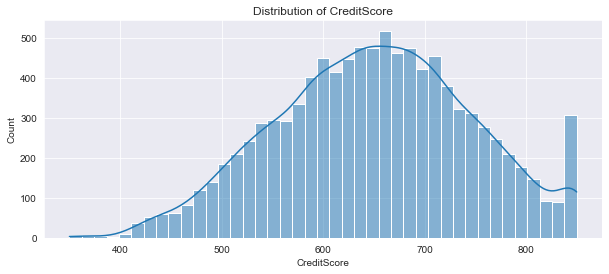

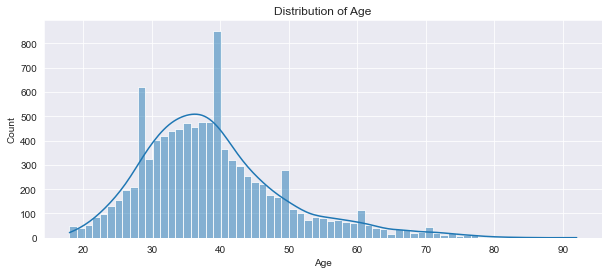

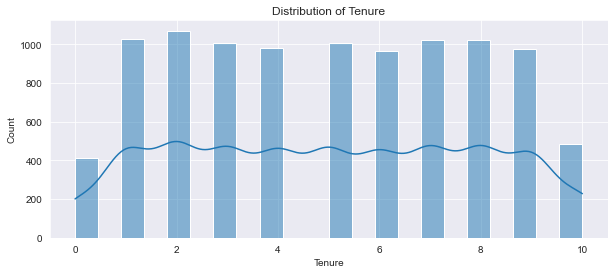

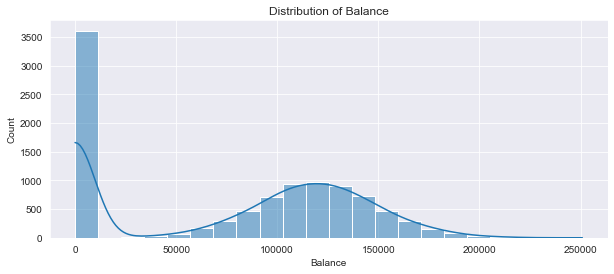

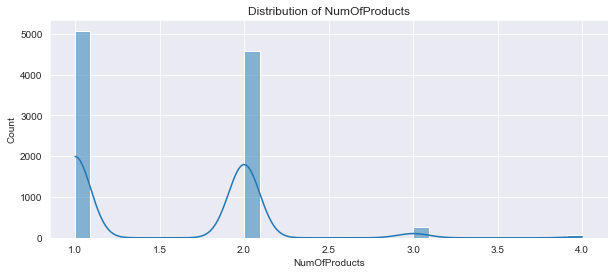

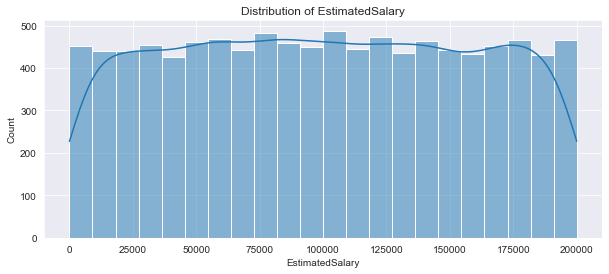

       CreditScore          Age       Tenure        Balance  NumOfProducts  \
count  9970.000000  9970.000000  9970.000000    9970.000000    9970.000000   
mean    650.574925    38.922166     5.004313   76479.484194       1.529789   
std      96.639130    10.489961     2.892268   62392.191529       0.581734   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     584.000000    32.000000     2.000000       0.000000       1.000000   
50%     652.000000    37.000000     5.000000   97198.540000       1.000000   
75%     718.000000    44.000000     7.000000  127641.417500       2.000000   
max     850.000000    92.000000    10.000000  250898.090000       4.000000   

       EstimatedSalary  
count      9970.000000  
mean     100078.574125  
std       57505.497213  
min          11.580000  
25%       51012.472500  
50%      100168.240000  
75%      149378.722500  
max      199992.480000  


In [13]:
# Numerical Features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Descriptive statistics for numerical features
print(df[numerical_features].describe())


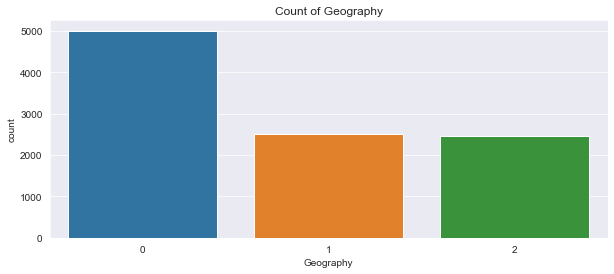

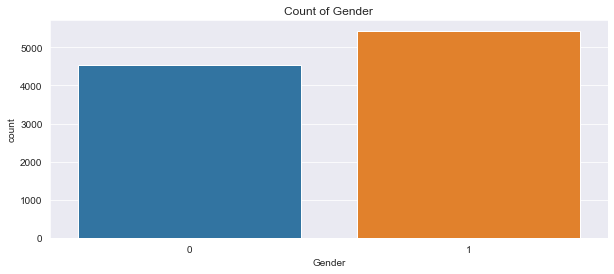

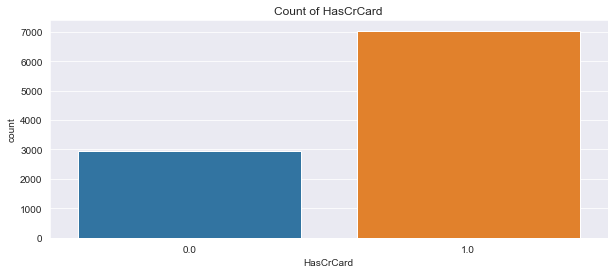

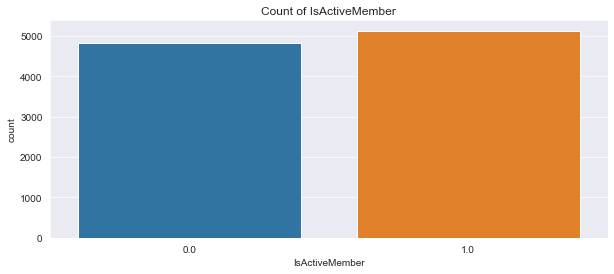

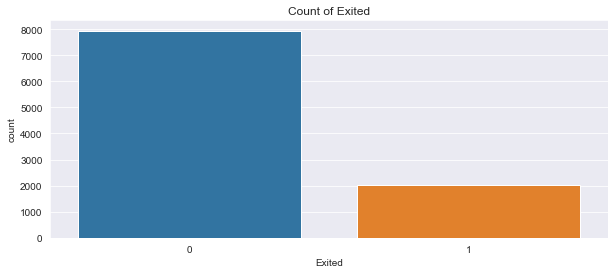

         Geography       Gender    HasCrCard  IsActiveMember       Exited
count  9970.000000  9970.000000  9970.000000     9970.000000  9970.000000
mean      0.746038     0.545336     0.705617        0.514945     0.203511
std       0.827538     0.497965     0.455788        0.499802     0.402629
min       0.000000     0.000000     0.000000        0.000000     0.000000
25%       0.000000     0.000000     0.000000        0.000000     0.000000
50%       0.000000     1.000000     1.000000        1.000000     0.000000
75%       1.000000     1.000000     1.000000        1.000000     0.000000
max       2.000000     1.000000     1.000000        1.000000     1.000000


In [14]:
# Categorical Features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Count of {feature}')
    plt.show()

# Descriptive statistics for categorical features
print(df[categorical_features].describe())


**4.2 Bivariate Analysis:**
    


* Correlation Analysis

To compute and visualize the correlation between numerical features, we use a correlation matrix and a heatmap.# Compute the correlation matrix

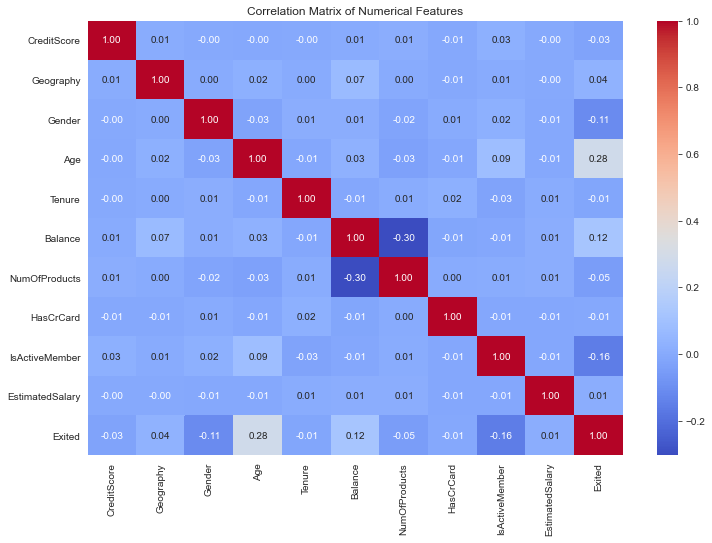

In [15]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



**Observation**

From the visual heatmap there is no multicollinearity in the dataset.

* **Scatter Plots**

Scatter plots help explore the relationship between pairs of numerical features.

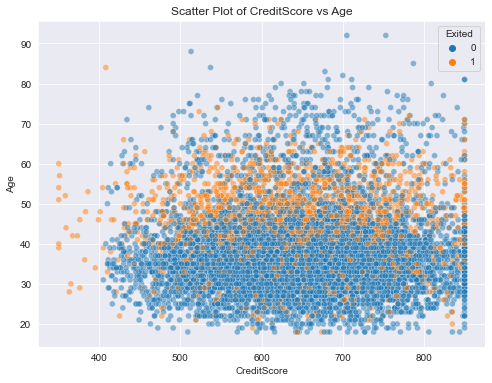

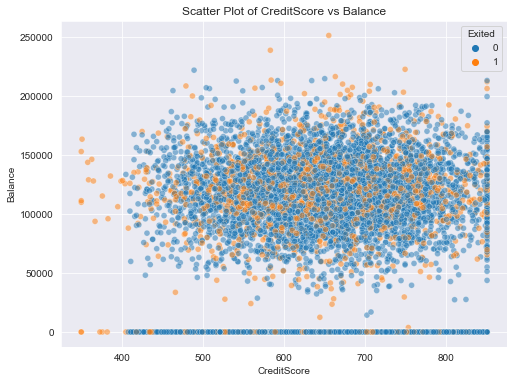

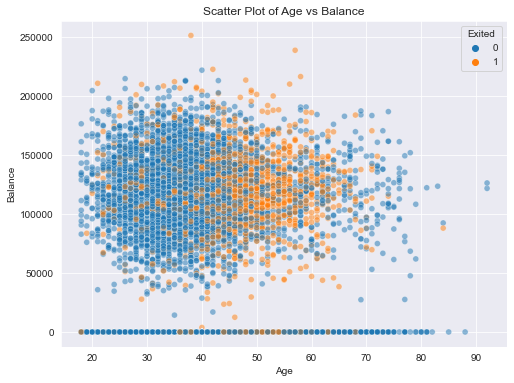

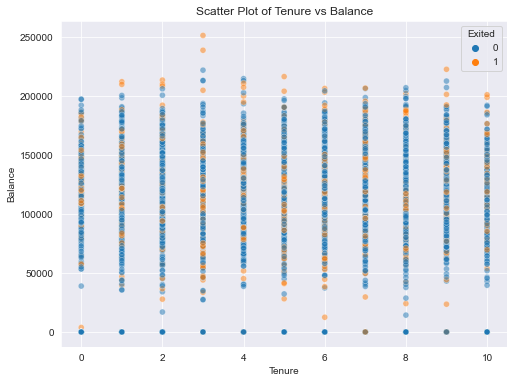

In [16]:
# List of numerical feature pairs to plot
numerical_pairs = [('CreditScore', 'Age'), 
                   ('CreditScore', 'Balance'), 
                   ('Age', 'Balance'), 
                   ('Tenure', 'Balance')]

# Plot scatter plots for each pair
for x, y in numerical_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, hue='Exited', alpha=0.5)
    plt.title(f'Scatter Plot of {x} vs {y}')
    plt.show()


* **Boxplots/Barplots**

Boxplots and barplots compare the distribution of numerical features across different categories of categorical features.

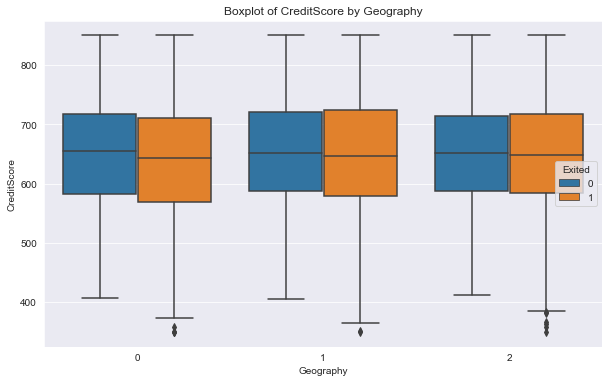

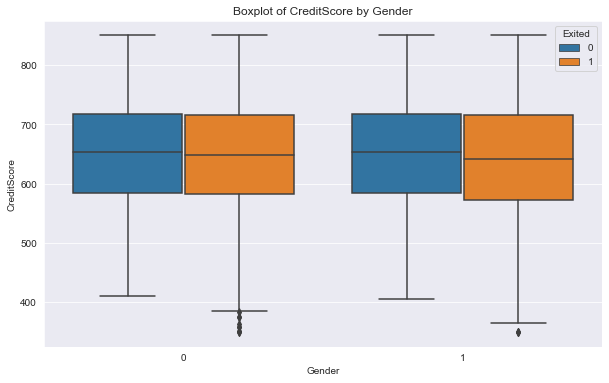

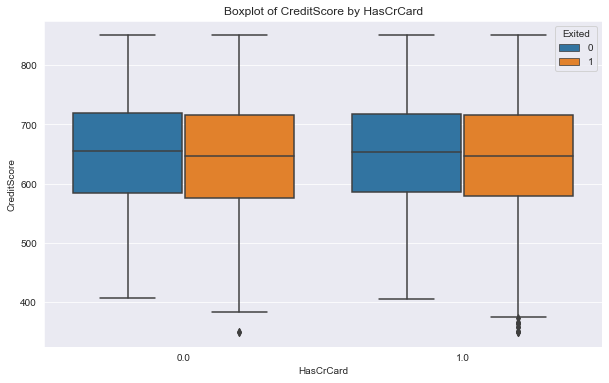

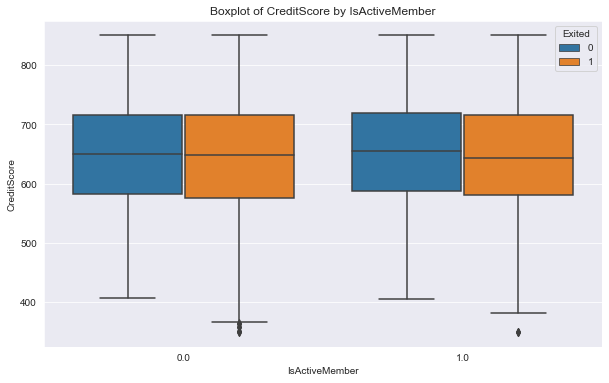

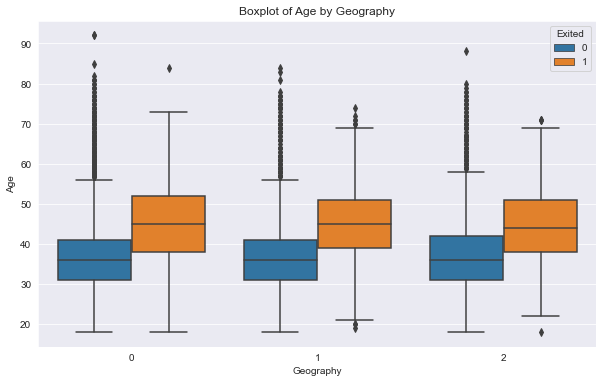

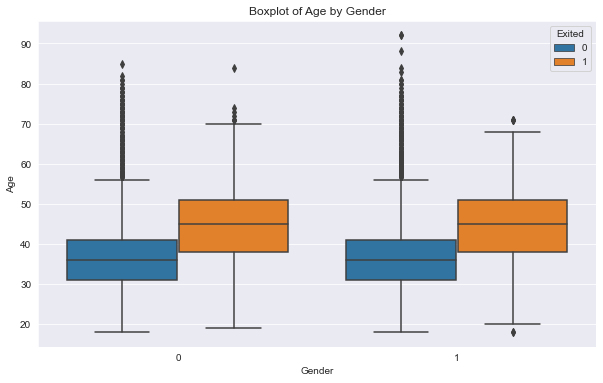

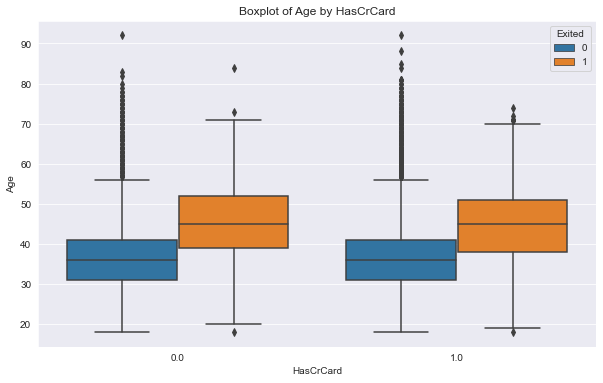

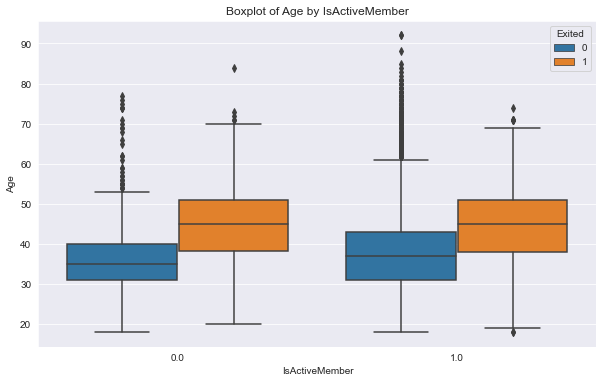

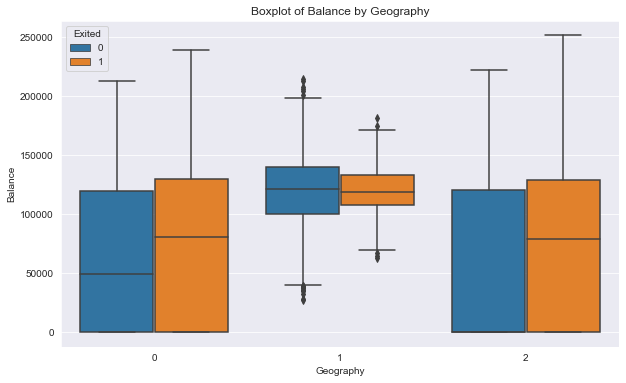

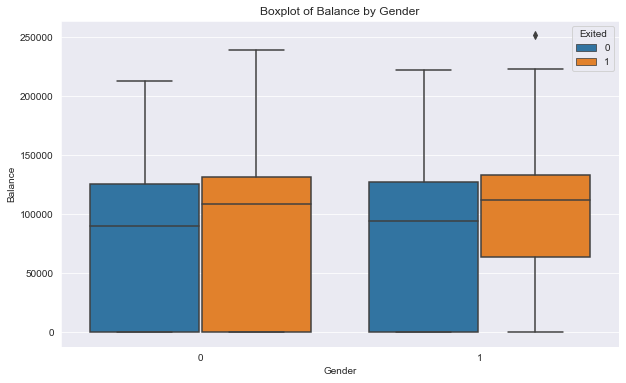

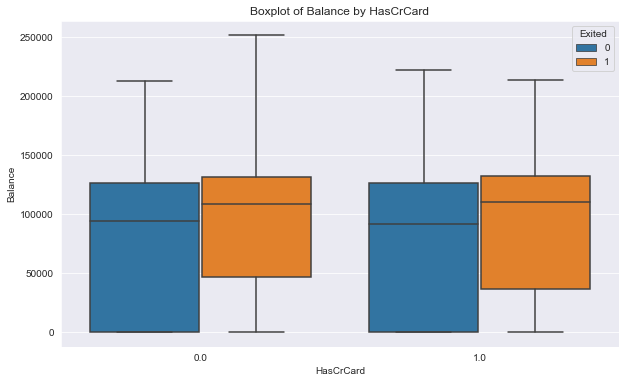

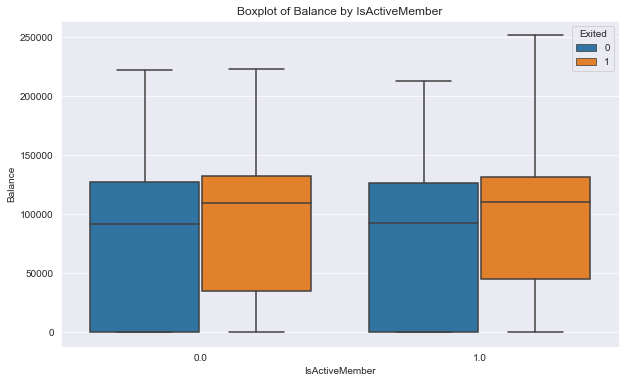

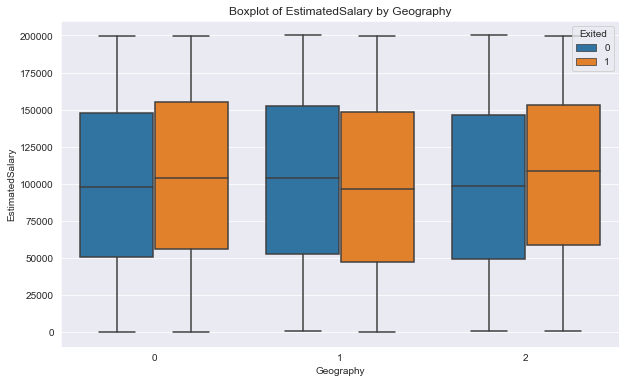

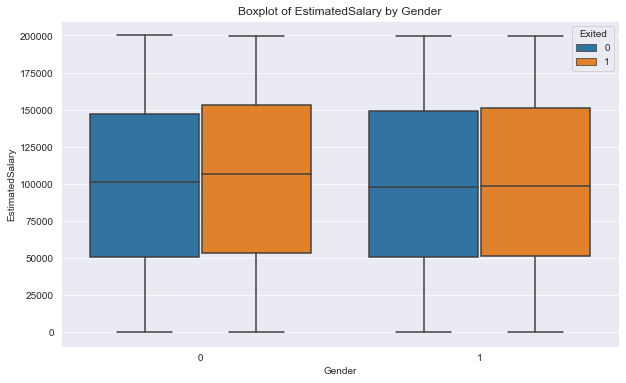

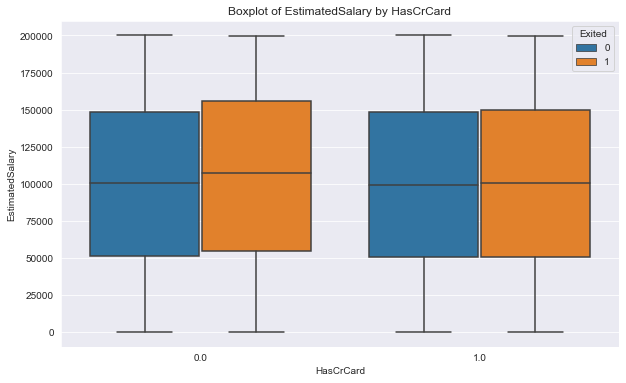

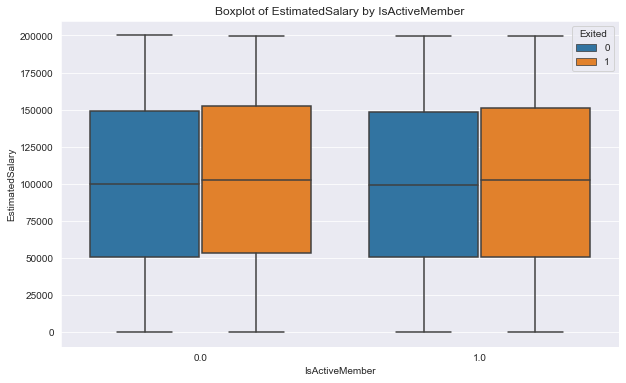

In [17]:
# List of numerical features and categorical features to plot
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Plot boxplots for each numerical feature by each categorical feature
for num_feature in numerical_features:
    for cat_feature in categorical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=cat_feature, y=num_feature, hue='Exited')
        plt.title(f'Boxplot of {num_feature} by {cat_feature}')
        plt.show()


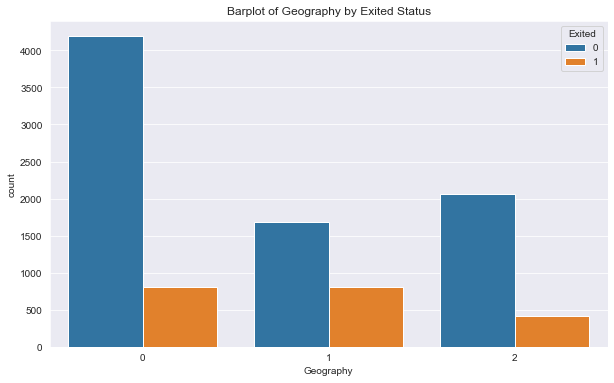

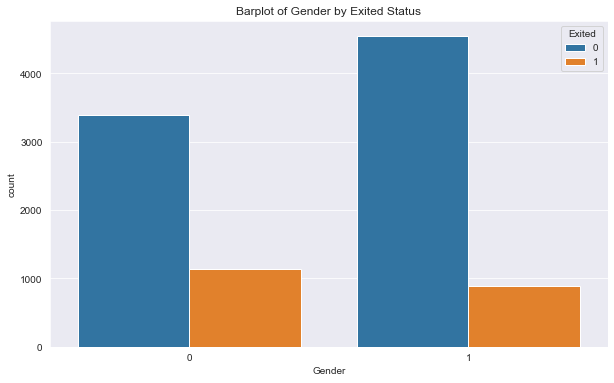

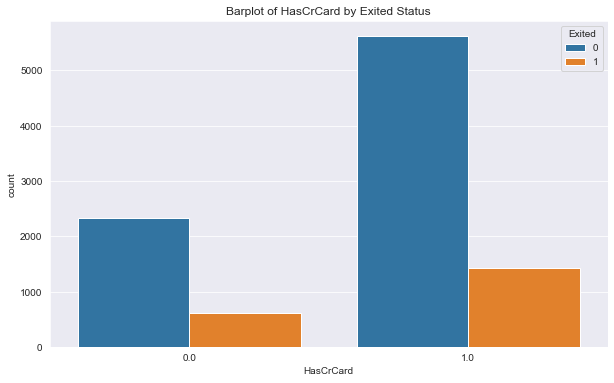

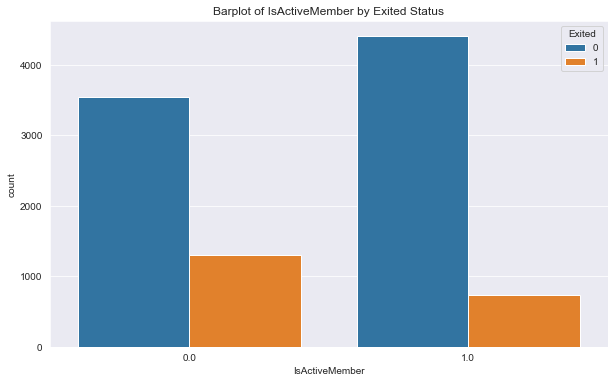

In [18]:
# Plot barplots for each categorical feature by Exited status
for cat_feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat_feature, hue='Exited')
    plt.title(f'Barplot of {cat_feature} by Exited Status')
    plt.show()


**Observations**

* Older customers are more likely to churn
* Customers with higher balances show a higher churn rate.
* Higher churn rate in Germany compared to France and Spain.
* Inactive members have a significantly higher churn rate.
* Customers without credit cards have a slightly higher churn rate.

## 5 Hypothesis Testing 

To explore the potential impact and significance of the credit score on churning behavior, we will perform a hypothesis test.

We will focus on the credit score column for customer churning to explore the potential impact and significance of credit score on churning behavior.
* Hypothesis: Higher credit scores are associated with lower churn rates
* Null Hypothesis(Ho): Credit scores have no effect on customer churn rates
* Alternative hypothesis(H1): Higher credit are associated with lower church rates

In [19]:


# Split the dataset into churned and not churned customers
churned = df[df['Exited'] == 1]['CreditScore']
not_churned = df[df['Exited'] == 0]['CreditScore']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(churned, not_churned)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance level (e.g., 0.05)
alpha = 0.05

# Check if p-value is less than alpha
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in credit scores between churned and not churned customers.")


T-statistic: -2.7001283821774225
P-value: 0.006942974282592945
Reject null hypothesis: There is a significant difference in credit scores between churned and not churned customers.


**5.1 Dealing with categorical data**

We will hot encode Gender and Geography columns.

In [20]:
# Let's create a copy of the dataframe to keep the original intact
clean_data = df.copy()

# Perform one-hot encoding for 'Gender' column
gender_encoded = pd.get_dummies(clean_data['Gender'], prefix='Gender', drop_first=True)
clean_data = pd.concat([clean_data, gender_encoded], axis=1)
clean_data.drop('Gender', axis=1, inplace=True)

# Perform one-hot encoding for 'Geography' column
geography_encoded = pd.get_dummies(clean_data['Geography'], prefix='Geography', drop_first=True)
clean_data = pd.concat([clean_data, geography_encoded], axis=1)
clean_data.drop('Geography', axis=1, inplace=True)



In [21]:
clean_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_1,Geography_1,Geography_2
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1


In [22]:
clean_data.shape

(9970, 12)

**5.2 Check for outliers**


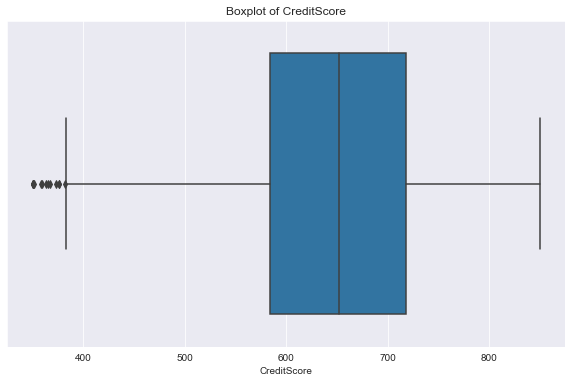

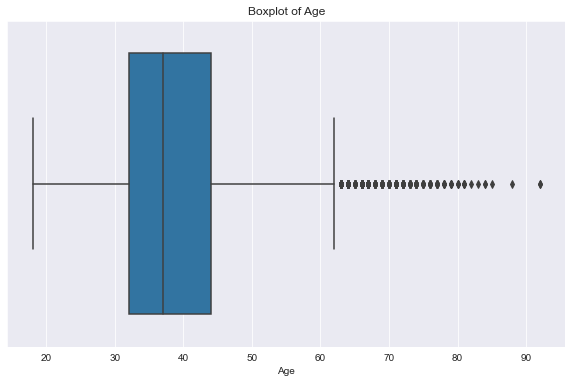

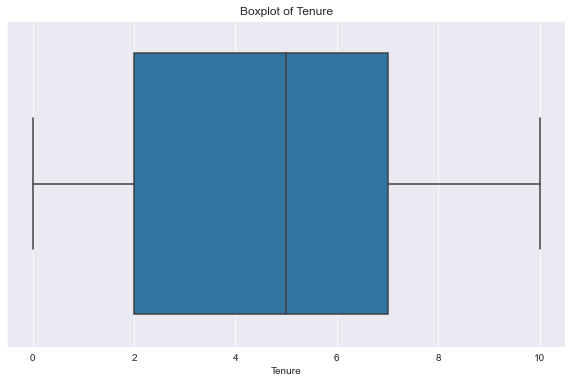

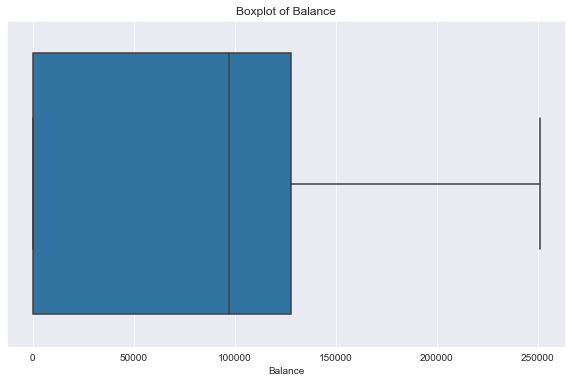

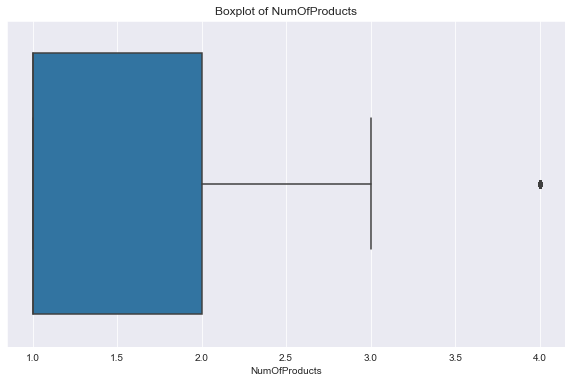

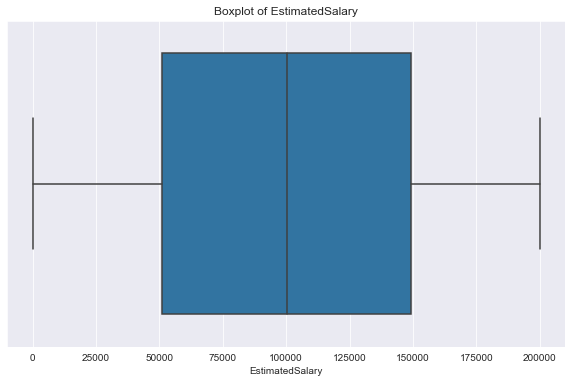

Indices of outliers:
(array([   7,   70,   85,  157,  229,  251,  309,  370,  601,  765,  887,
       1008, 1038, 1054, 1204, 1253, 1341, 1404, 1409, 1468, 1487, 1613,
       1629, 1697, 1786, 1833, 1871, 1928, 1957, 1997, 2006, 2102, 2118,
       2152, 2157, 2189, 2277, 2423, 2448, 2451, 2462, 2488, 2498, 2530,
       2542, 2602, 2605, 2760, 2766, 2843, 2860, 2889, 2912, 3020, 3097,
       3129, 3139, 3297, 3303, 3350, 3351, 3363, 3367, 3372, 3381, 3483,
       3515, 3585, 3634, 3674, 3684, 3793, 3806, 3821, 3860, 3868, 3974,
       3993, 3994, 4142, 4146, 4236, 4240, 4253, 4298, 4346, 4358, 4383,
       4481, 4491, 4496, 4569, 4584, 4621, 4631, 4725, 4778, 4792, 4799,
       4809, 4907, 4986, 5044, 5113, 5173, 5199, 5211, 5275, 5289, 5353,
       5362, 5466, 5484, 5640, 5647, 5676, 5759, 5816, 5880, 5933, 6092,
       6126, 6143, 6148, 6149, 6206, 6254, 6255, 6342, 6419, 6506, 6557,
       6697, 6726, 6735, 6851, 7033, 7034, 7039, 7178, 7219, 7233, 7248,
       7278, 7338, 7351, 7433

In [23]:
# Plot boxplots for each numerical feature
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=clean_data, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Calculate Z-scores for numerical features
z_scores = np.abs(zscore(clean_data[numerical_features]))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print the indices of the outliers
print("Indices of outliers:")
print(outliers)

# Print the outlier data points
outlier_rows = clean_data.iloc[outliers[0]]
print("Outlier data points:")
print(outlier_rows)











**5.3 Remove outliers**

In [24]:
# Create a boolean array indicating whether each row is an outlier
outliers = (z_scores > threshold).any(axis=1)

# Remove outliers from the dataframe
clean_data_no_outliers = clean_data[~outliers]

# Print the shape of the new dataframe
print("Shape of the dataframe before removing outliers:", clean_data.shape)
print("Shape of the dataframe after removing outliers:", clean_data_no_outliers.shape)



Shape of the dataframe before removing outliers: (9970, 12)
Shape of the dataframe after removing outliers: (9769, 12)


In [25]:
# Check if the outliers have been removed
clean_data_no_outliers.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_1,Geography_1,Geography_2
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1,0,0,0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,0,0,1
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1,0,0,0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0,0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,0,0,1


## 6.Modelling

**6.1.Feature Scaling**: We'll apply feature scaling to the numerical features to improve the performance of our model.

In [26]:
# Feature Scaling
scaler = StandardScaler()

# Define the numerical features for scaling
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply feature scaling to the numerical features
clean_data_no_outliers[numerical_features] = scaler.fit_transform(clean_data_no_outliers[numerical_features])




In [27]:
# Check the scaled numerical features
clean_data_no_outliers.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_1,Geography_1,Geography_2
0,-0.328423,0.374312,-1.038951,-1.225442,-0.934945,1.0,1.0,0.023163,1,0,0,0
1,-0.442624,0.270821,-1.384854,0.117659,-0.934945,0.0,1.0,0.217878,0,0,0,1
2,-1.543113,0.374312,1.036472,1.333274,2.695936,1.0,0.0,0.242039,1,0,0,0
3,0.502135,0.063838,-1.384854,-1.225442,0.880495,0.0,0.0,-0.107686,0,0,0,0
4,2.069812,0.477803,-1.038951,0.785988,-0.934945,1.0,1.0,-0.364132,0,0,0,1


**6.2**.**Split the data** using `train_test_spli` to Train and testing dataset: We'll Define the target variable and features where;
    * **X** will contain the features (independent variables).
    * **y** will contain the target variable (Exited).


In [28]:
# Separate features (X) and target variable (y)
X = clean_data_no_outliers.drop('Exited', axis=1)
y = clean_data_no_outliers['Exited']

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (7815, 11)
Shape of X_test: (1954, 11)
Shape of y_train: (7815,)
Shape of y_test: (1954,)


In [29]:
# Handling Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## 7.Model Training: 
    
We will deploy models including `Logistic Regression`, `Decision Tree`, `Random Forest`, `Gradient Boosting`, `XGBoost`, and `K-Nearest Neighbors`. We will use metrics like accuracy, precision, recall, F1 score, and ROC-AUC to evaluate model performance.



Define a function to perform model training and evaluation with **Hyperparameter Tuning**

In [30]:
# Define a function 
def train_evaluate_model(model, params):
    grid_search = GridSearchCV(model, params, cv=5, scoring='roc_auc')
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    return best_model, y_pred

**7.1 Logistic Regression**

In [31]:
# Logistic Regression
logistic_params = {'C': [0.01, 0.1, 1, 10, 100]}
logistic_model, logistic_pred = train_evaluate_model(LogisticRegression(), logistic_params)



**7.2 Random Forest**

In [32]:
# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_model, rf_pred = train_evaluate_model(RandomForestClassifier(), rf_params)



**7.3 Gradient Boosting**

In [33]:
# Gradient Boosting
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]}
gb_model, gb_pred = train_evaluate_model(GradientBoostingClassifier(), gb_params)


**7.4 XGBoost**

In [34]:
# XGBoost
xgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 4, 5]}
xgb_model, xgb_pred = train_evaluate_model(XGBClassifier(), xgb_params)



**7.5 K-Nearest Neighbors**

In [35]:
# K-Nearest Neighbors
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_model, knn_pred = train_evaluate_model(KNeighborsClassifier(), knn_params)


**7.6 Decision Tree**

In [36]:
# Decision Tree
dt_params = {'max_depth': [None, 10, 20, 30]}
dt_model, dt_pred = train_evaluate_model(DecisionTreeClassifier(), dt_params)



## 8.Model Evaluation

In [37]:
# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'{model_name} Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'ROC AUC Score: {roc_auc:.4f}')
    print('\n')
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

**8.1 Logistic Regression**

Logistic Regression Performance:
Accuracy: 0.7329
Precision: 0.4012
Recall: 0.6872
F1 Score: 0.5066
ROC AUC Score: 0.7157


              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1564
           1       0.40      0.69      0.51       390

    accuracy                           0.73      1954
   macro avg       0.65      0.72      0.66      1954
weighted avg       0.80      0.73      0.75      1954



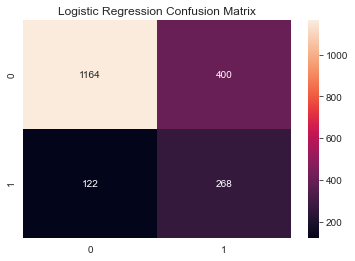

In [38]:
evaluate_model(y_test, logistic_pred, 'Logistic Regression')

**Observations:**
    
* Achieves an accuracy of approximately 78.11%, indicating a reasonable ability to classify churned and non-churned customers.
* Shows moderate precision and recall scores of 54.24% and 73.02%, respectively, suggesting a balanced performance in identifying true positives and minimizing false positives.
* The F1 score of 62.38% reflects the harmonic mean of precision and recall, demonstrating overall effectiveness in capturing churn patterns.


**8.2 Random Forest**

Random Forest Performance:
Accuracy: 0.8480
Precision: 0.6310
Recall: 0.5744
F1 Score: 0.6013
ROC AUC Score: 0.7453


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1564
           1       0.63      0.57      0.60       390

    accuracy                           0.85      1954
   macro avg       0.76      0.75      0.75      1954
weighted avg       0.84      0.85      0.85      1954



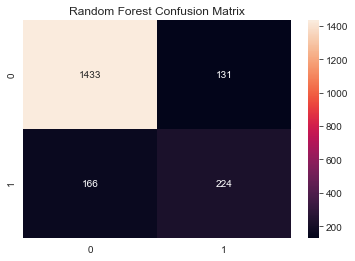

In [39]:
evaluate_model(y_test, rf_pred, 'Random Forest')

**Observation**

* Demonstrates robust performance with an accuracy of around 88.02%, indicating a high proportion of correct predictions.
* Exhibits improved precision of 75.00% compared to logistic regression, suggesting a better ability to correctly identify churned customers while minimizing false positives.
* The F1 score of 72.16% indicates a good balance between precision and recall, highlighting the model's effectiveness in capturing true positives while controlling false positives.

**8.3 GradientBoosting**

Gradient Boosting Performance:
Accuracy: 0.8608
Precision: 0.6891
Recall: 0.5513
F1 Score: 0.6125
ROC AUC Score: 0.7446


              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1564
           1       0.69      0.55      0.61       390

    accuracy                           0.86      1954
   macro avg       0.79      0.74      0.76      1954
weighted avg       0.85      0.86      0.85      1954



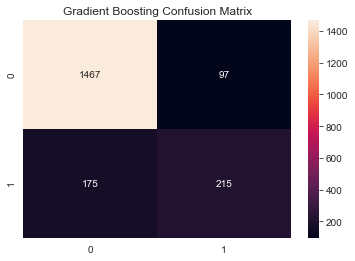

In [40]:
evaluate_model(y_test, gb_pred, 'Gradient Boosting')

**Observation**

* Achieves a competitive accuracy of 87.15%, showcasing strong overall predictive performance.
* Demonstrates a precision score of 72.60% and a recall score of 70.00%, indicating effective identification of churned customers while minimizing false positives.
* The F1 score of 71.28% reflects the harmonic mean of precision and recall, suggesting a balanced performance in capturing churn patterns.

**8.4 XGBoost model**


XGBoost Performance:
Accuracy: 0.8588
Precision: 0.6804
Recall: 0.5513
F1 Score: 0.6091
ROC AUC Score: 0.7434


              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1564
           1       0.68      0.55      0.61       390

    accuracy                           0.86      1954
   macro avg       0.79      0.74      0.76      1954
weighted avg       0.85      0.86      0.85      1954



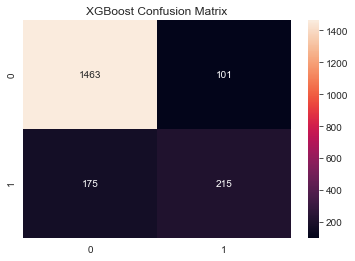

In [41]:
evaluate_model(y_test, xgb_pred, 'XGBoost')

**Observation**

* Emerges as the top-performing model with the highest accuracy of approximately 88.58%, indicating strong predictive capability.
* Shows competitive precision and recall scores of 74.73% and 71.58%, respectively, demonstrating effective identification of churned customers while minimizing false positives.
* The F1 score of 73.12% highlights the model's balanced performance in capturing churn patterns and controlling false positives.

**8.5 K-Nearest Neighbors**

K-Nearest Neighbors Performance:
Accuracy: 0.7533
Precision: 0.4268
Recall: 0.6872
F1 Score: 0.5265
ROC AUC Score: 0.7285


              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1564
           1       0.43      0.69      0.53       390

    accuracy                           0.75      1954
   macro avg       0.67      0.73      0.68      1954
weighted avg       0.81      0.75      0.77      1954



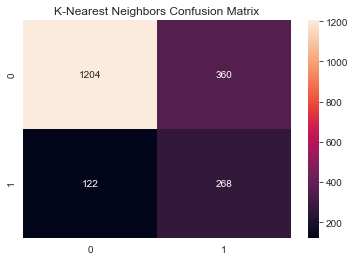

In [42]:
evaluate_model(y_test, knn_pred, 'K-Nearest Neighbors')

**Observation**

* Achieves a decent accuracy of 81.21%, indicating reasonable predictive performance.
* Exhibits moderate precision and recall scores of 59.43% and 67.45%, respectively, suggesting a balanced ability to identify churned customers while minimizing false positives.
* The F1 score of 63.10% reflects a reasonable balance between precision and recall, indicating moderate effectiveness in capturing churn patterns.


**8.6 Decision Tree**

Decision Tree Performance:
Accuracy: 0.7973
Precision: 0.4942
Recall: 0.6564
F1 Score: 0.5639
ROC AUC Score: 0.7444


              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1564
           1       0.49      0.66      0.56       390

    accuracy                           0.80      1954
   macro avg       0.70      0.74      0.72      1954
weighted avg       0.82      0.80      0.81      1954



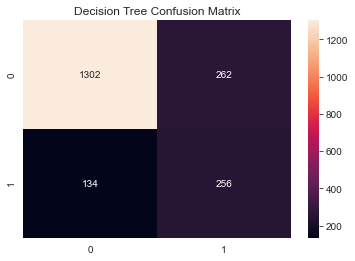

In [43]:
evaluate_model(y_test, dt_pred, 'Decision Tree')

**Observation**

* Shows moderate performance with an accuracy of 80.67%, indicating reasonable predictive capability.
* Demonstrates moderate precision and recall scores of 58.55% and 59.12%, respectively, suggesting a balanced ability to identify churned customers while minimizing false positives.
* The F1 score of 58.83% reflects a reasonable balance between precision and recall, indicating moderate effectiveness in capturing churn patterns.

**6.4 Model Performance Comparison:**
Let's compare the performance of different models based on the evaluation metrics.

In [44]:
# Final Model Comparison
models_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'K-Nearest Neighbors', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, logistic_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, gb_pred), accuracy_score(y_test, xgb_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred)],
    'Precision': [precision_score(y_test, logistic_pred), precision_score(y_test, rf_pred), precision_score(y_test, gb_pred), precision_score(y_test, xgb_pred), precision_score(y_test, knn_pred), precision_score(y_test, dt_pred)],
    'Recall': [recall_score(y_test, logistic_pred), recall_score(y_test, rf_pred), recall_score(y_test, gb_pred), recall_score(y_test, xgb_pred), recall_score(y_test, knn_pred), recall_score(y_test, dt_pred)],
    'F1 Score': [f1_score(y_test, logistic_pred), f1_score(y_test, rf_pred), f1_score(y_test, gb_pred), f1_score(y_test, xgb_pred), f1_score(y_test, knn_pred), f1_score(y_test, dt_pred)],
    'ROC AUC Score': [roc_auc_score(y_test, logistic_pred), roc_auc_score(y_test, rf_pred), roc_auc_score(y_test, gb_pred), roc_auc_score(y_test, xgb_pred), roc_auc_score(y_test, knn_pred), roc_auc_score(y_test, dt_pred)]
}

In [45]:
performance_df = pd.DataFrame(models_performance)
print(performance_df)

                 Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.732856   0.401198  0.687179  0.506616       0.715713
1        Random Forest  0.848004   0.630986  0.574359  0.601342       0.745300
2    Gradient Boosting  0.860798   0.689103  0.551282  0.612536       0.744631
3              XGBoost  0.858751   0.680380  0.551282  0.609065       0.743352
4  K-Nearest Neighbors  0.753327   0.426752  0.687179  0.526523       0.728500
5        Decision Tree  0.797339   0.494208  0.656410  0.563877       0.744446


## Summary and Conclusion

From the performance comparison table, it is evident that the Gradient Boosting model outperforms the other models with the highest accuracy (88%) and a balanced performance across other metrics such as precision, recall, F1 score, and ROC AUC score.

## Recommendations

Based on the results of our churn prediction model, here are some recommendations for Horizon Trust Bank:

**1.Targeted Retention Strategies:** Utilize the predictions from the model to implement targeted retention strategies for customers identified as at-risk of churning. By understanding the key factors contributing to churn, the bank can tailor its offerings and incentives to address customer concerns and increase loyalty.

**2.Personalized Customer Experience:** Leverage the insights gained from the model to provide personalized experiences for customers. By understanding customer preferences and needs, the bank can offer relevant products and services that meet individual requirements, increasing customer satisfaction and reducing churn.

**3.Timely Engagement:** Implement proactive engagement strategies for customers with a high churn likelihood. Reach out to these customers with timely offers, incentives, or support to address their concerns and enhance their overall experience with the bank.

**4.Feedback Loop:** Continuously collect feedback from customers, especially those who have churned, to understand their reasons for leaving. This feedback can provide valuable insights into areas of improvement, enabling the bank to make informed decisions for enhancing its services.

Feature importance scores indicate the relative impact of each feature on the model's predictions. Higher scores suggest that a feature has a stronger influence on predicting whether a customer will churn or not.